# Aprendizaje No Supervisado

In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 

In [2]:
mainpath = "../Datasets/"
filename = "HVAC.xlsx"
fullpath = os.path.join(mainpath, filename)

In [3]:
data = pd.read_excel(fullpath, "HISTORICO_DATOS")
data.head()

,Fecha- hora de lectura,POTENCIA TRAFO 2,POTENCIA TRAFO 3,POTENCIA TRAFO 4,POTENCIA TRAFO 5,POTENCIA MEDIA CONECTADA,PERIODO P6,CONTROL FRÍO,CONTROL CALOR,CAPACIDAD BOMBA CALOR FELIPE %,...,SECUNDARIO FRÍO 1,SECUNDARIO FRÍO 2,SECUNDARIO FRÍO 3,IMPULSIÓN SECUNDARIO CALOR,MODO INVIERNO BC1,MODO INVIERNO BC2,SECUNDARIO CALOR 1,SECUNDARIO CALOR 2,SECUNDARIO CALOR 3,ORDEN
0,2016-01-01 00:00:00,0.783603,38.338665,232.182602,235.755234,557.290039,0.000000,26.984179,34.337925,4.266667,...,0.0,0.0,7.954935,22.497906,0,0,100.0,100.0,100.0,35433
1,2016-01-01 00:15:00,0.926969,38.338665,197.970230,113.384056,372.547760,0.866667,26.805664,34.337925,0.000000,...,0.0,0.0,0.588573,22.497906,0,0,-25.0,-25.0,-25.0,35441
2,2016-01-01 00:30:00,0.793163,38.455196,211.676941,236.968918,469.299347,1.000000,26.055836,34.337925,0.000000,...,0.0,0.0,0.000000,22.288696,0,0,-25.0,-25.0,-25.0,35442
3,2016-01-01 00:45:00,0.860073,38.688263,206.066818,298.481995,570.994995,1.000000,25.266325,34.337925,0.000000,...,0.0,0.0,0.000000,22.273752,0,0,-25.0,-25.0,-25.0,35443
4,2016-01-01 01:00:00,0.812257,38.688263,193.984100,292.789215,563.804016,1.000000,25.605207,34.330490,0.000000,...,0.0,0.0,0.000000,22.408245,0,0,-25.0,-25.0,-25.0,35444


In [4]:
data2 = data
variables_a_eliminar = ["C_O_P_ BOMBA CALOR FELIPE", "C_O_P_ BOMBA CALOR CARLOS",
                        "C_O_P_ INSTALACIÓN GRUPO FRÍO 1", "C_O_P_ INSTALACÍON GRUPO FRÍO 2",
                        "ORDEN", "VÁLVULA BY PASS SECUNDARIO FRÍO",
                        "TEMPERATURA CONTROL DE BY PASS SECUNDARIO", "SECUNDARIO FRÍO 1",
                        "SECUNDARIO FRÍO 2", "SECUNDARIO FRÍO 3", "MODO INVIERNO BC1", 
                        "MODO INVIERNO BC2", "PERIODO P6", "CONTROL CALOR", 
                        "CAPACIDAD BOMBA CALOR FELIPE %", "CAPACIDAD BOMBA CALOR CARLOS %",
                        "CAPACIDAD GRUPO DE FRÍO 1"," CAPACIDAD GRUPO DE FRÍO 2",
                        "IMPULSIÓN SECUNDARIO CALOR", "SECUNDARIO CALOR 1", 
                        "SECUNDARIO CALOR 2", "SECUNDARIO CALOR 3",
                        "Fecha- hora de lectura"]
lista_variables = data2.columns.values.tolist()
subLista = [x for x in lista_variables if x not in variables_a_eliminar]
data2 = data2[subLista]
data2.describe()

,POTENCIA TRAFO 2,POTENCIA TRAFO 3,POTENCIA TRAFO 4,POTENCIA TRAFO 5,POTENCIA MEDIA CONECTADA,CONTROL FRÍO,POTENCIA BOMBA CALOR FELIPE,POTENCIA BOMBA CALOR CARLOS,TEMPERATURA AMBIENTE BOMBA CALOR CARLOS,TEMPERATURA AMBIENTE BOMBA CALOR FELIPE,...,C_O_P MÁQUINA GRUPO FRÍO 1,C_O_P MÁQUINA GRUPO FRÍO 2,C_O_P BOMBA CALOR CARLOS,C_O_P BOMBA CALOR FELIPE,TEMPERATURA SALIDA BOMBA CALOR CARLOS,TEMPERATURA SALIDA BOMBA CALOR FELIPE,KILO CALORÍAS GENERADAS BOMBA CALOR CARLOS,KILO CALORÍAS GENERADAS BOMBA CALOR FELIPE,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2
count,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,...,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,7.928500e+04,79285.000000
mean,21.263587,29.153558,318.143167,348.748790,767.229633,8.943993,32.952675,33.616413,22.312328,20.941832,...,3.060061,5.193729,1.603675,1.360955,29.447289,27.899720,113632.621253,98875.029377,8.206856e+04,84085.364562
std,29.226093,20.322527,109.800553,173.801800,308.224618,7.620269,45.304465,43.907480,5.375236,5.262494,...,45.129189,63.743173,2.059181,1.884063,13.676912,13.937344,128906.154196,125502.269258,1.014195e+05,101157.202135
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2.820000,20.617067,230.915283,161.846664,459.953339,0.000000,0.640000,0.480000,18.950001,18.000000,...,0.000000,0.000000,0.000000,0.000000,16.940001,14.794000,8493.352539,3639.967773,0.000000e+00,0.000000
50%,9.016216,26.100000,347.246704,404.859985,866.000549,12.690000,0.700000,0.500000,22.110001,21.309999,...,0.000000,1.000000,0.000000,0.000000,34.740002,28.799999,40299.847656,21060.041016,1.935001e+04,24750.005859
75%,23.946667,34.566841,408.166656,475.656067,1016.214844,14.010000,66.543999,67.599998,25.799999,24.110001,...,4.264040,4.277048,3.689127,3.273391,42.450001,41.980000,220046.687500,195520.031250,1.484000e+05,142400.000000
max,227.385345,246.656601,565.151428,854.659973,1569.602173,102.169998,157.706665,164.206665,38.669998,36.257999,...,2521.533447,3772.673828,74.741554,95.940002,47.889999,47.889999,509556.656250,509729.968750,2.040950e+06,354950.031250


In [5]:
data3 = data2
data3["POTENCIA TERMICA BOMBA CALOR CARLOS"] = data2["KILO CALORÍAS GENERADAS BOMBA CALOR CARLOS"] * 0.001163
data3["POTENCIA TERMICA BOMBA CALOR FELIPE"] = data2["KILO CALORÍAS GENERADAS BOMBA CALOR FELIPE"] * 0.001163
data3["POTENCIA TERMICA GRUPO FRIO 1"] = data2["KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1"] * 0.001163
data3["POTENCIA TERMICA GRUPO FRIO 2"] = data2["KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2"] * 0.001163
data3.head()

C:\Users\dag17\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dag17\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dag17\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,POTENCIA TRAFO 2,POTENCIA TRAFO 3,POTENCIA TRAFO 4,POTENCIA TRAFO 5,POTENCIA MEDIA CONECTADA,CONTROL FRÍO,POTENCIA BOMBA CALOR FELIPE,POTENCIA BOMBA CALOR CARLOS,TEMPERATURA AMBIENTE BOMBA CALOR CARLOS,TEMPERATURA AMBIENTE BOMBA CALOR FELIPE,...,TEMPERATURA SALIDA BOMBA CALOR CARLOS,TEMPERATURA SALIDA BOMBA CALOR FELIPE,KILO CALORÍAS GENERADAS BOMBA CALOR CARLOS,KILO CALORÍAS GENERADAS BOMBA CALOR FELIPE,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2,POTENCIA TERMICA BOMBA CALOR CARLOS,POTENCIA TERMICA BOMBA CALOR FELIPE,POTENCIA TERMICA GRUPO FRIO 1,POTENCIA TERMICA GRUPO FRIO 2
0,0.783603,38.338665,232.182602,235.755234,557.290039,26.984179,7.253334,7.061334,17.268667,17.053333,...,36.190666,36.192665,28599.992188,26129.994141,4400.000488,29349.998047,33.261791,30.389183,5.117201,34.134048
1,0.926969,38.338665,197.970230,113.384056,372.547760,26.805664,0.800000,0.480000,18.049334,18.143999,...,33.625999,32.770664,163366.671875,193396.765625,18550.000000,0.000000,189.995439,224.920438,21.573650,0.000000
2,0.793163,38.455196,211.676941,236.968918,469.299347,26.055836,0.800000,0.480000,17.046000,18.285332,...,33.247997,32.559998,103306.765625,137973.359375,218650.000000,96750.000000,120.145768,160.463017,254.289950,112.520250
3,0.860073,38.688263,206.066818,298.481995,570.994995,25.266325,0.800000,0.480000,13.052667,16.986666,...,32.989998,32.559998,73883.296875,102829.898438,247150.000000,214850.000000,85.926274,119.591172,287.435450,249.870550
4,0.812257,38.688263,193.984100,292.789215,563.804016,25.605207,0.800000,0.480000,10.656666,15.002000,...,32.719997,32.242664,50396.769531,81683.398438,238550.000000,203300.000000,58.611443,94.997792,277.433650,236.437900


## KMeans

El algoritmo trabaja iterativamente para asignar a cada dato uno de los K grupos basadose en sus características, es decir, son agrupados en base a la similitud de sus features (las columnas).
Los grupos se van definiendo en cada iteración del proceso, hasta que converge el algoritmo. Una vez hallados los *centroids* deberemos analizarlos para ver cuales son sus características únicas, frente a la de los otros grupos.

In [24]:
dataCarlos = data3[['POTENCIA BOMBA CALOR CARLOS', 'POTENCIA TERMICA BOMBA CALOR CARLOS', 'TEMPERATURA EXTERIOR',
          'TEMPERATURA SALIDA BOMBA CALOR CARLOS']]
dataCarlos.describe()

,POTENCIA BOMBA CALOR CARLOS,POTENCIA TERMICA BOMBA CALOR CARLOS,TEMPERATURA EXTERIOR,TEMPERATURA SALIDA BOMBA CALOR CARLOS
count,79285.000000,79285.000000,79285.000000,79285.000000
mean,33.616413,132.154739,15.083257,29.447289
std,43.907480,149.917857,11.345877,13.676912
min,0.000000,0.000000,-1.400000,0.000000
25%,0.480000,9.877769,6.968000,16.940001
50%,0.500000,46.868723,13.353139,34.740002
75%,67.599998,255.914298,23.717333,42.450001
max,164.206665,592.614391,43.799999,47.889999


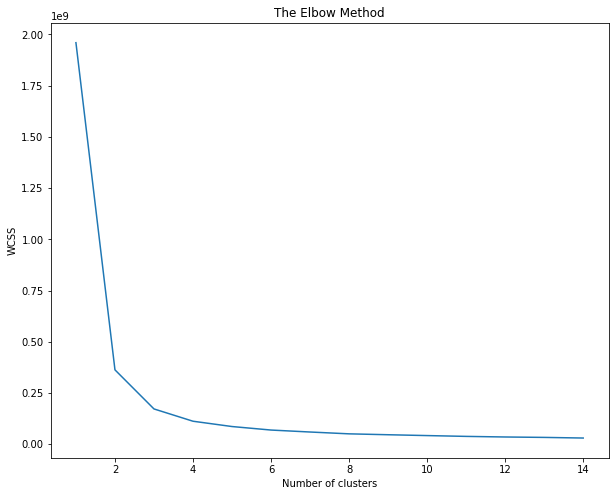

In [19]:
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(dataCarlos)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(dataCarlos)
centroids = kmeans.cluster_centers_

In [53]:
minPotenciaCarlos = 0 
maxPotenciaCarlos = 34
minPotenciaTermicaCarlos = 0 
maxPotenciaTermicaCarlos = 132
minTempExterior = 4
maxTempExterior = 26
minTempSalidaCarlos = 16
maxTempSalidaCarlos = 42
length = len(centroids)
for i in range(length):
    if not ((centroids[i][0] > minPotenciaCarlos) and (centroids[i][0] <= maxPotenciaCarlos)):
        print('cluster ', i+1, ' anomalo')
    elif not ((centroids[i][1] > minPotenciaTermicaCarlos) and (centroids[i][1] <= maxPotenciaTermicaCarlos)):
        print('cluster ', i+1, ' anomalo')
    elif not ((centroids[i][2] > minTempExterior) and (centroids[i][2] <= maxTempExterior)):
        print('cluster ', i+1, ' anomalo')
    elif not ((centroids[i][3] > minTempSalidaCarlos) and (centroids[i][3] <= maxTempSalidaCarlos)):
        print('cluster ', i+1, ' anomalo')
    else:
        print('cluster ', i+1, ' bueno')

cluster  1  anomalo
cluster  2  bueno
cluster  3  anomalo
cluster  4  anomalo


In [37]:
centroids

array([[ 82.87897402, 302.99949014,  14.84358427,  35.10525943],
       [  2.37224558,  21.61104305,  15.93663239,  25.71559689],
       [122.31165593, 439.417927  ,  11.39833341,  37.90099185],
       [ 41.99169895, 170.88723186,  14.24259748,  32.2172756 ]])